In [53]:
#imports to work with...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import DataLoader
import torch
import torchvision
from torchvision import transforms

from cl_framework.dataset.dataset_utils import KineticsDataset

In [54]:
#load train from csv
path_to_download_log = '../Kinetics/Download/attempt_14/download_log.csv'
data_csv = pd.read_csv(path_to_download_log)



In [55]:
#dict of classes and behaviors
data_dict = {
    'food': [
        'eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts',
        'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon',
        'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup'
    ],
    'phone': [
        'texting', 'talking on cell phone', 'looking at phone'
    ],
    'smoking': [
        'smoking', 'smoking hookah', 'smoking pipe'
    ],
    'fatigue': [
        'sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head'
    ],
    'selfcare': [
        'scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation',
        'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair',
        'combing hair', 'dyeing eyebrows', 'dyeing hair'
    ]
}

torch.Size([3, 50, 172, 172])


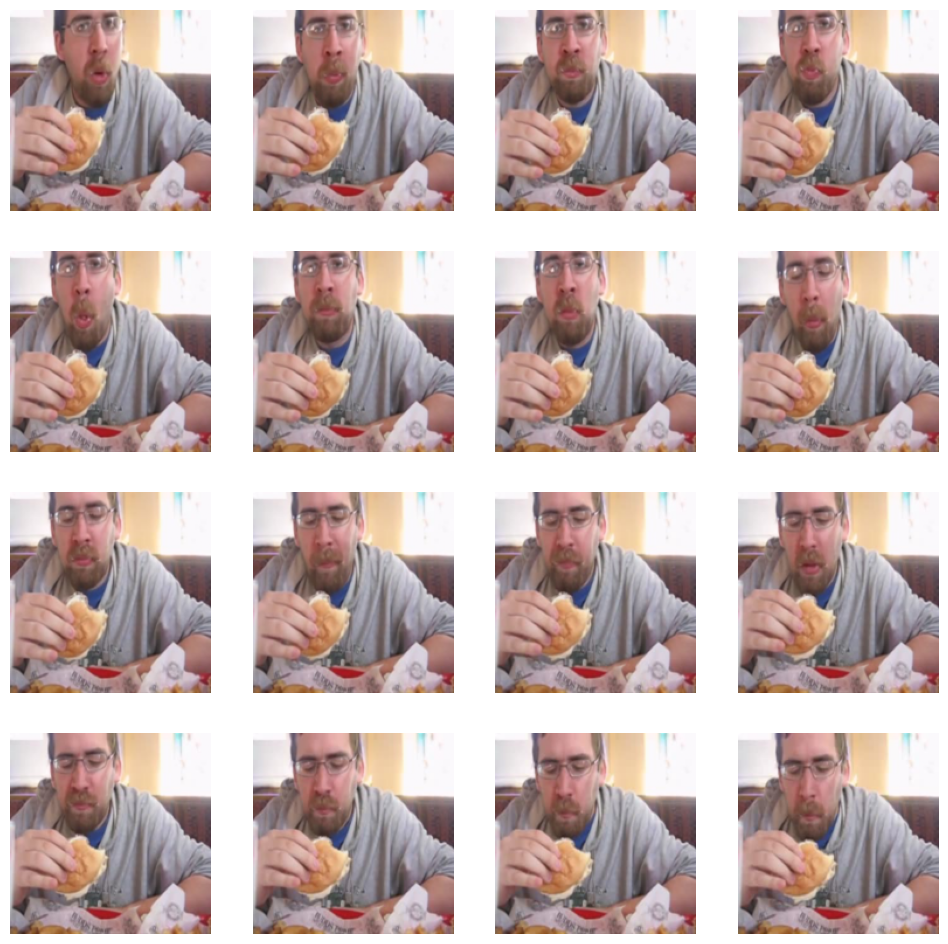

In [56]:
train_transform = [transforms.Resize(size=(172,172)),
                           transforms.CenterCrop(172),
                transforms.ToTensor(),
                #TODO:normalize?
                #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                ]
train_transform = transforms.Compose(train_transform)

data = KineticsDataset('../Kinetics', train_transform, dataset_type='train', fps=5)

loader = DataLoader(data, batch_size=1)

images, _, _ = next(iter(loader))

print(images[0].shape)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[0, :, i, ...].permute(1, 2, 0))
    plt.axis("off")
